<a href="https://colab.research.google.com/github/bathaee/QGAN-EQ-GAN/blob/main/Noisy_quantum_classic_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit --upgrade
!pip install qiskit-machine-learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00


In [59]:
import torch
from qiskit.utils import algorithm_globals

algorithm_globals.random_seed = 123456
_ = torch.manual_seed(123456)  # suppress output

In [60]:
import numpy as np

num_dim = 2
num_discrete_values = 8
num_qubits = num_dim * int(np.log2(num_discrete_values))

In [61]:
from scipy.stats import multivariate_normal

coords = np.linspace(-2, 2, num_discrete_values)
rv = multivariate_normal(mean=[0.0, 0.0], cov=[[1, 0], [0, 1]], seed=algorithm_globals.random_seed)
grid_elements = np.transpose([np.tile(coords, len(coords)), np.repeat(coords, len(coords))])
prob_data = rv.pdf(grid_elements)
prob_data = prob_data / np.sum(prob_data)

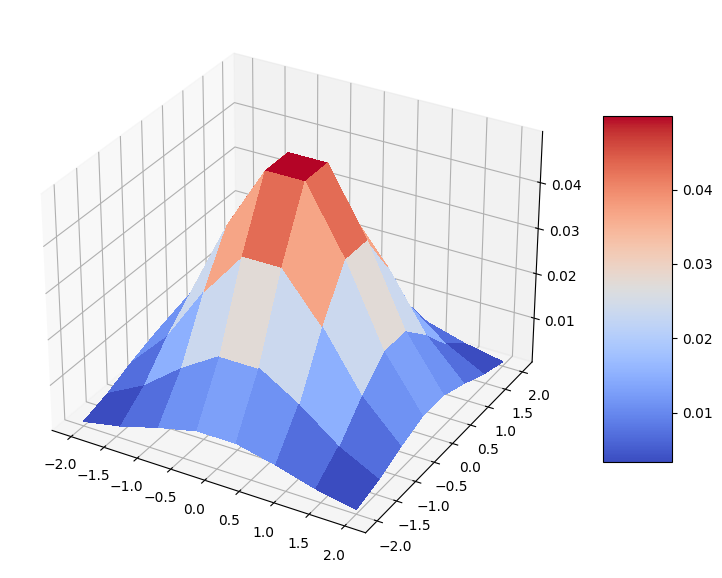

In [62]:
import matplotlib.pyplot as plt
from matplotlib import cm

mesh_x, mesh_y = np.meshgrid(coords, coords)
grid_shape = (num_discrete_values, num_discrete_values)

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={"projection": "3d"})
prob_grid = np.reshape(prob_data, grid_shape)
surf = ax.plot_surface(mesh_x, mesh_y, prob_grid, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [64]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import EfficientSU2

qc = QuantumCircuit(num_qubits)
qc.h(qc.qubits)

#ansatz = EfficientSU2(num_qubits, su2_gates=['ry'], entanglement='circular', reps=1,insert_barriers=True)
ansatz = EfficientSU2(num_qubits, reps=6,insert_barriers=True)
qc.compose(ansatz, inplace=True)
qc.decompose().draw()

┌─────────┐┌──────────┐ ┌──────────┐ ░                           ░ »
q_0: ┤ U2(0,π) ├┤ Ry(θ[0]) ├─┤ Rz(θ[6]) ├─░───────────────────────■───░─»
     ├─────────┤├──────────┤ ├──────────┤ ░                     ┌─┴─┐ ░ »
q_1: ┤ U2(0,π) ├┤ Ry(θ[1]) ├─┤ Rz(θ[7]) ├─░──────────────────■──┤ X ├─░─»
     ├─────────┤├──────────┤ ├──────────┤ ░                ┌─┴─┐└───┘ ░ »
q_2: ┤ U2(0,π) ├┤ Ry(θ[2]) ├─┤ Rz(θ[8]) ├─░─────────────■──┤ X ├──────░─»
     ├─────────┤├──────────┤ ├──────────┤ ░           ┌─┴─┐└───┘      ░ »
q_3: ┤ U2(0,π) ├┤ Ry(θ[3]) ├─┤ Rz(θ[9]) ├─░────────■──┤ X ├───────────░─»
     ├─────────┤├──────────┤┌┴──────────┤ ░      ┌─┴─┐└───┘           ░ »
q_4: ┤ U2(0,π) ├┤ Ry(θ[4]) ├┤ Rz(θ[10]) ├─░───■──┤ X ├────────────────░─»
     ├─────────┤├──────────┤├───────────┤ ░ ┌─┴─┐└───┘                ░ »
q_5: ┤ U2(0,π) ├┤ Ry(θ[5]) ├┤ Rz(θ[11]) ├─░─┤ X ├─────────────────────░─»
     └─────────┘└──────────┘└───────────┘ ░ └───┘                     ░ »
«     ┌───────────┐┌───────────┐ ░                           ░ ┌───────────┐»
«q_0: ┤ Ry(θ[12]) ├┤ Rz(θ[18]) ├─░───────────────────────■───░─┤ Ry(θ[24]) ├»
«     ├───────────┤├───────────┤ ░                     ┌─┴─┐ ░ ├───────────┤»
«q_1: ┤ Ry(θ[13]) ├┤ Rz(θ[19]) ├─░──────────────────■──┤ X ├─░─┤ Ry(θ[25]) ├»
«     ├───────────┤├───────────┤ ░                ┌─┴─┐└───┘ ░ ├───────────┤»
«q_2: ┤ Ry(θ[14]) ├┤ Rz(θ[20]) ├─░─────────────■──┤ X ├──────░─┤ Ry(θ[26]) ├»
«     ├───────────┤├───────────┤ ░           ┌─┴─┐└───┘      ░ ├───────────┤»
«q_3: ┤ Ry(θ[15]) ├┤ Rz(θ[21]) ├─░────────■──┤ X ├───────────░─┤ Ry(θ[27]) ├»
«     ├───────────┤├───────────┤ ░      ┌─┴─┐└───┘           ░ ├───────────┤»
«q_4: ┤ Ry(θ[16]) ├┤ Rz(θ[22]) ├─░───■──┤ X ├────────────────░─┤ Ry(θ[28]) ├»
«     ├───────────┤├───────────┤ ░ ┌─┴─┐└───┘                ░ ├───────────┤»
«q_5: ┤ Ry(θ[17]) ├┤ Rz(θ[23]) ├─░─┤ X ├─────────────────────░─┤ Ry(θ[29]) ├»
«     └───────────┘└───────────┘ ░ └───┘                     ░ └───────────┘»
«     ┌───────────┐ ░                           ░ ┌───────────┐┌───────────┐ ░ »
«q_0: ┤ Rz(θ[30]) ├─░───────────────────────■───░─┤ Ry(θ[36]) ├┤ Rz(θ[42]) ├─░─»
«     ├───────────┤ ░                     ┌─┴─┐ ░ ├───────────┤├───────────┤ ░ »
«q_1: ┤ Rz(θ[31]) ├─░──────────────────■──┤ X ├─░─┤ Ry(θ[37]) ├┤ Rz(θ[43]) ├─░─»
«     ├───────────┤ ░                ┌─┴─┐└───┘ ░ ├───────────┤├───────────┤ ░ »
«q_2: ┤ Rz(θ[32]) ├─░─────────────■──┤ X ├──────░─┤ Ry(θ[38]) ├┤ Rz(θ[44]) ├─░─»
«     ├───────────┤ ░           ┌─┴─┐└───┘      ░ ├───────────┤├───────────┤ ░ »
«q_3: ┤ Rz(θ[33]) ├─░────────■──┤ X ├───────────░─┤ Ry(θ[39]) ├┤ Rz(θ[45]) ├─░─»
«     ├───────────┤ ░      ┌─┴─┐└───┘           ░ ├───────────┤├───────────┤ ░ »
«q_4: ┤ Rz(θ[34]) ├─░───■──┤ X ├────────────────░─┤ Ry(θ[40]) ├┤ Rz(θ[46]) ├─░─»
«     ├───────────┤ ░ ┌─┴─┐└───┘                ░ ├───────────┤├───────────┤ ░ »
«q_5: ┤ Rz(θ[35]) ├─░─┤ X ├─────────────────────░─┤ Ry(θ[41]) ├┤ Rz(θ[47]) ├─░─»
«     └───────────┘ ░ └───┘                     ░ └───────────┘└───────────┘ ░ »
«                               ░ ┌───────────┐┌───────────┐ ░                »
«q_0: ──────────────────────■───░─┤ Ry(θ[48]) ├┤ Rz(θ[54]) ├─░────────────────»
«                         ┌─┴─┐ ░ ├───────────┤├───────────┤ ░                »
«q_1: ─────────────────■──┤ X ├─░─┤ Ry(θ[49]) ├┤ Rz(θ[55]) ├─░────────────────»
«                    ┌─┴─┐└───┘ ░ ├───────────┤├───────────┤ ░                »
«q_2: ────────────■──┤ X ├──────░─┤ Ry(θ[50]) ├┤ Rz(θ[56]) ├─░─────────────■──»
«               ┌─┴─┐└───┘      ░ ├───────────┤├───────────┤ ░           ┌─┴─┐»
«q_3: ───────■──┤ X ├───────────░─┤ Ry(θ[51]) ├┤ Rz(θ[57]) ├─░────────■──┤ X ├»
«          ┌─┴─┐└───┘           ░ ├───────────┤├───────────┤ ░      ┌─┴─┐└───┘»
«q_4: ──■──┤ X ├────────────────░─┤ Ry(θ[52]) ├┤ Rz(θ[58]) ├─░───■──┤ X ├─────»
«     ┌─┴─┐└───┘                ░ ├───────────┤├───────────┤ ░ ┌─┴─┐└───┘     »
«q_5: ┤ X ├─────────────────────░─┤ Ry(θ[53]) ├┤ Rz(θ[59]) ├─░─┤ X ├──────────»
«     └───┘     

In [66]:
#Added by Marzieh : zofal Q-generator
from qiskit import QuantumCircuit
from qiskit.circuit.library import TwoLocal
qc_zofal = TwoLocal(num_qubits,
                     # Parameterized single qubit rotations
                     ['ry'],
                     'cz',  # Entangling gate
                     'full', # Entanglement structure: all to all
                     reps=6, # Number of layers
                     parameter_prefix='θ_g',
                     name='Generator',
                    insert_barriers=True)
qc_zofa = qc_zofal.decompose() # decompose into standard gates
#qc_zofal.decompose().draw()

In [67]:
from qiskit import QuantumCircuit, execute, Aer,transpile
from qiskit.primitives import Sampler
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import qiskit_aer.noise as noise
from qiskit.utils import algorithm_globals

In [68]:
#Custom Noise model for measurment, x and cx gates

# Error probabilities
prob_1 = 0.01  # 1-qubit gate
prob_2 = 0.01  # 2-qubit gate
prob_m = 0.1   # Measurment error

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)
error_meas = noise.pauli_error([('X',prob_m), ('I', 1 - prob_m)])

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['x'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
noise_model.add_all_qubit_quantum_error(error_meas, "measure")

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

#print(basis_gates)

In [69]:
from qiskit.primitives import Sampler

shots = 10000
sampler = Sampler(options={"shots": shots, "seed": algorithm_globals.random_seed })

In [70]:
# Quantum generator: without noise and noisy
from qiskit_machine_learning.connectors import TorchConnector
from qiskit_machine_learning.neural_networks import SamplerQNN

def create_generator() -> TorchConnector:
    qnn = SamplerQNN(
        circuit=qc,
        sampler=sampler,
        input_params=[],
        weight_params=qc.parameters,
        sparse=False,
    )

    initial_weights = algorithm_globals.random.random(qc.num_parameters)
    return TorchConnector(qnn, initial_weights)

def create_generator_noise() -> TorchConnector:
    sim_noise = AerSimulator(noise_model=noise_model)
    qcn = transpile(qc, sim_noise)
    qnn = SamplerQNN(
        circuit=qcn,
        sampler=sampler,
        input_params=[],
        weight_params=qc.parameters,
        sparse=False,
    )

    initial_weights = algorithm_globals.random.random(qc.num_parameters)
    return TorchConnector(qnn, initial_weights)

def create_generator_zofal() -> TorchConnector:
    qnn = SamplerQNN(
        circuit=qc_zofal,
        sampler=sampler,
        input_params=[],
        weight_params=qc_zofal.parameters,
        sparse=False,
    )

    initial_weights = algorithm_globals.random.random(qc_zofal.num_parameters)
    return TorchConnector(qnn, initial_weights)  

def create_generator_zofal_noise() -> TorchConnector:
    sim_noise = AerSimulator(noise_model=noise_model)
    qc_zofaln = transpile(qc_zofal, sim_noise)
    qnn = SamplerQNN(
        circuit=qc_zofaln,
        sampler=sampler,
        input_params=[],
        weight_params=qc_zofal.parameters,
        sparse=False,
    )

    initial_weights = algorithm_globals.random.random(qc_zofal.num_parameters)
    return TorchConnector(qnn, initial_weights)  

In [71]:
#classical discriminator
from torch import nn

class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()

        self.linear_input = nn.Linear(input_size, 20)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.linear20 = nn.Linear(20, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        x = self.linear_input(input)
        x = self.leaky_relu(x)
        x = self.linear20(x)
        x = self.sigmoid(x)
        return x

In [72]:
#Create generator and discriminator

generator = create_generator()
generator_noise = create_generator_noise()
generator_zofal = create_generator_zofal()
generator_zofal_noise = create_generator_zofal_noise()
discriminator = Discriminator(num_dim)

In [74]:
len(generator(torch.tensor([])).reshape(-1, 1))

64

In [75]:
#Loss
def adversarial_loss(input, target, w):
    bce_loss = target * torch.log(input) + (1 - target) * torch.log(1 - input)
    weighted_loss = w * bce_loss
    total_loss = -torch.sum(weighted_loss)
    return total_loss

In [76]:
#Optimizer :Hyper parameters
from torch.optim import Adam

lr = 0.01  # learning rate
b1 = 0.7  # first momentum parameter
b2 = 0.999  # second momentum parameter

generator_optimizer = Adam(generator.parameters(), lr=lr, betas=(b1, b2), weight_decay=0.005)
generator_optimizer_noise = Adam(generator_noise.parameters(), lr=lr, betas=(b1, b2), weight_decay=0.005)
generator_optimizer_zofal = Adam(generator_zofal.parameters(), lr=lr, betas=(b1, b2), weight_decay=0.005)
generator_optimizer_zofal_noise = Adam(generator_zofal_noise.parameters(), lr=lr, betas=(b1, b2), weight_decay=0.005)
discriminator_optimizer = Adam(discriminator.parameters(), lr=lr, betas=(b1, b2), weight_decay=0.005)

In [79]:
from IPython.display import clear_output


def plot_training_progress():
    # we don't plot if we don't have enough data
    if len(generator_loss_values) < 2:
        return

    clear_output(wait=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

    # Generator Loss
    ax1.set_title("Loss")
    ax1.plot(generator_loss_values, label="generator loss", color="royalblue")
    ax1.plot(discriminator_loss_values, label="discriminator loss", color="magenta")
    ax1.legend(loc="best")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Loss")
    ax1.grid()

    # Relative Entropy
    ax2.set_title("Relative entropy")
    ax2.plot(entropy_values)
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("Relative entropy")
    ax2.grid()

    plt.show()

def plot_training_progress_noise():
    # we don't plot if we don't have enough data
    if len(generator_loss_values) < 2:
        return

    clear_output(wait=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

    # Generator Loss
    ax1.set_title("Loss_noisy")
    ax1.plot(generator_loss_values, label="generator loss", color="royalblue")
    ax1.plot(discriminator_loss_values, label="discriminator loss", color="magenta")
    ax1.legend(loc="best")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Loss")
    ax1.grid()

    # Relative Entropy
    ax2.set_title("Relative entropy_noisy")
    ax2.plot(entropy_values)
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("Relative entropy")
    ax2.grid()

    plt.show()    

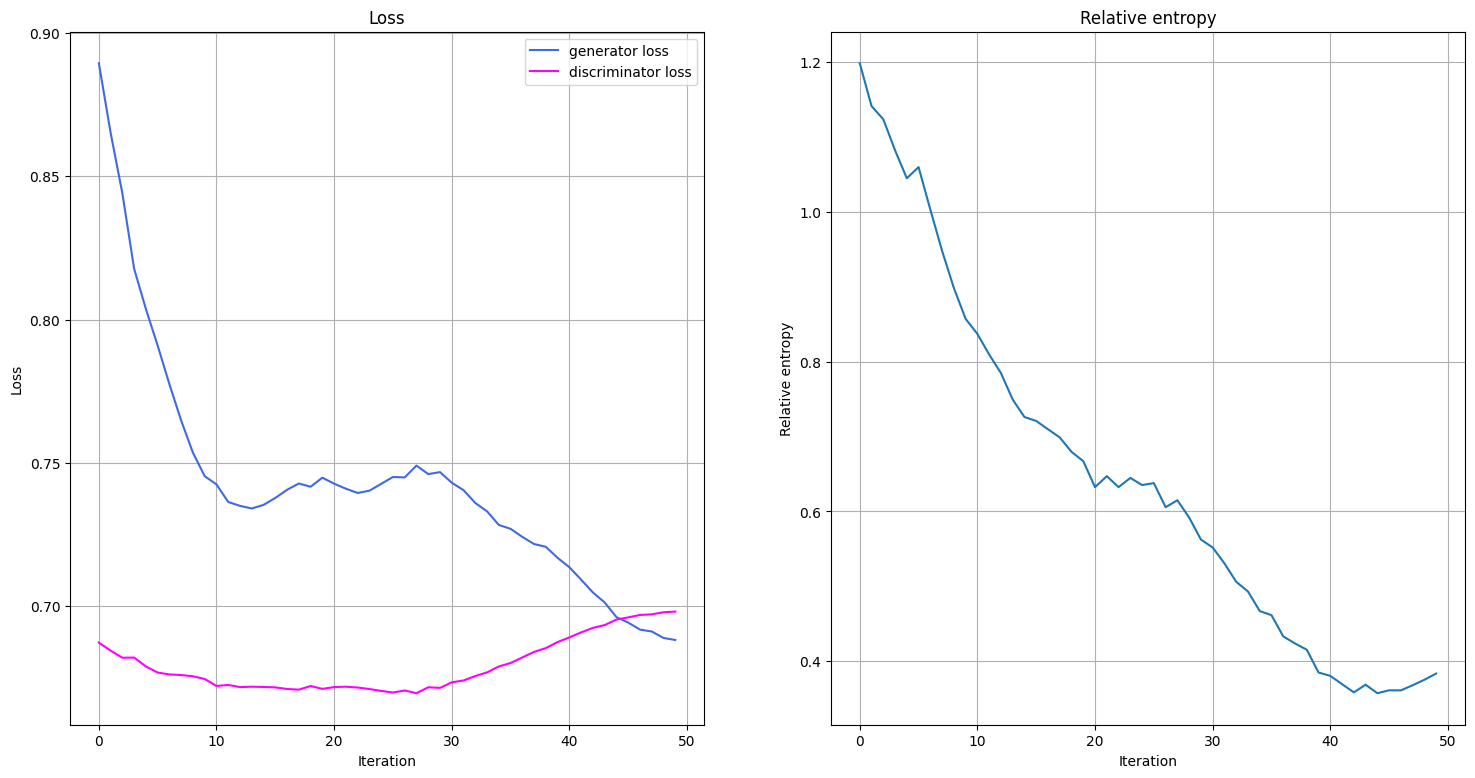

Fit in 190.28 sec


In [78]:
#without noise
import time
from scipy.stats import multivariate_normal, entropy

n_epochs = 50

num_qnn_outputs = num_discrete_values**num_dim

generator_loss_values = []
discriminator_loss_values = []
entropy_values = []

start = time.time()
for epoch in range(n_epochs):

    valid = torch.ones(num_qnn_outputs, 1, dtype=torch.float)
    fake = torch.zeros(num_qnn_outputs, 1, dtype=torch.float)

    # Configure input
    real_dist = torch.tensor(prob_data, dtype=torch.float).reshape(-1, 1)

    # Configure samples
    samples = torch.tensor(grid_elements, dtype=torch.float)
    disc_value = discriminator(samples)

    # Generate data
    gen_dist = generator(torch.tensor([])).reshape(-1, 1)

    # Train generator
    generator_optimizer.zero_grad()
    generator_loss = adversarial_loss(disc_value, valid, gen_dist)

    # store for plotting
    generator_loss_values.append(generator_loss.detach().item())

    generator_loss.backward(retain_graph=True)
    generator_optimizer.step()

    # Train Discriminator
    discriminator_optimizer.zero_grad()

    real_loss = adversarial_loss(disc_value, valid, real_dist)
    fake_loss = adversarial_loss(disc_value, fake, gen_dist.detach())
    discriminator_loss = (real_loss + fake_loss) / 2

    # Store for plotting
    discriminator_loss_values.append(discriminator_loss.detach().item())

    discriminator_loss.backward()
    discriminator_optimizer.step()

    entropy_value = entropy(gen_dist.detach().squeeze().numpy(), prob_data)
    entropy_values.append(entropy_value)

    plot_training_progress()

elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} sec")

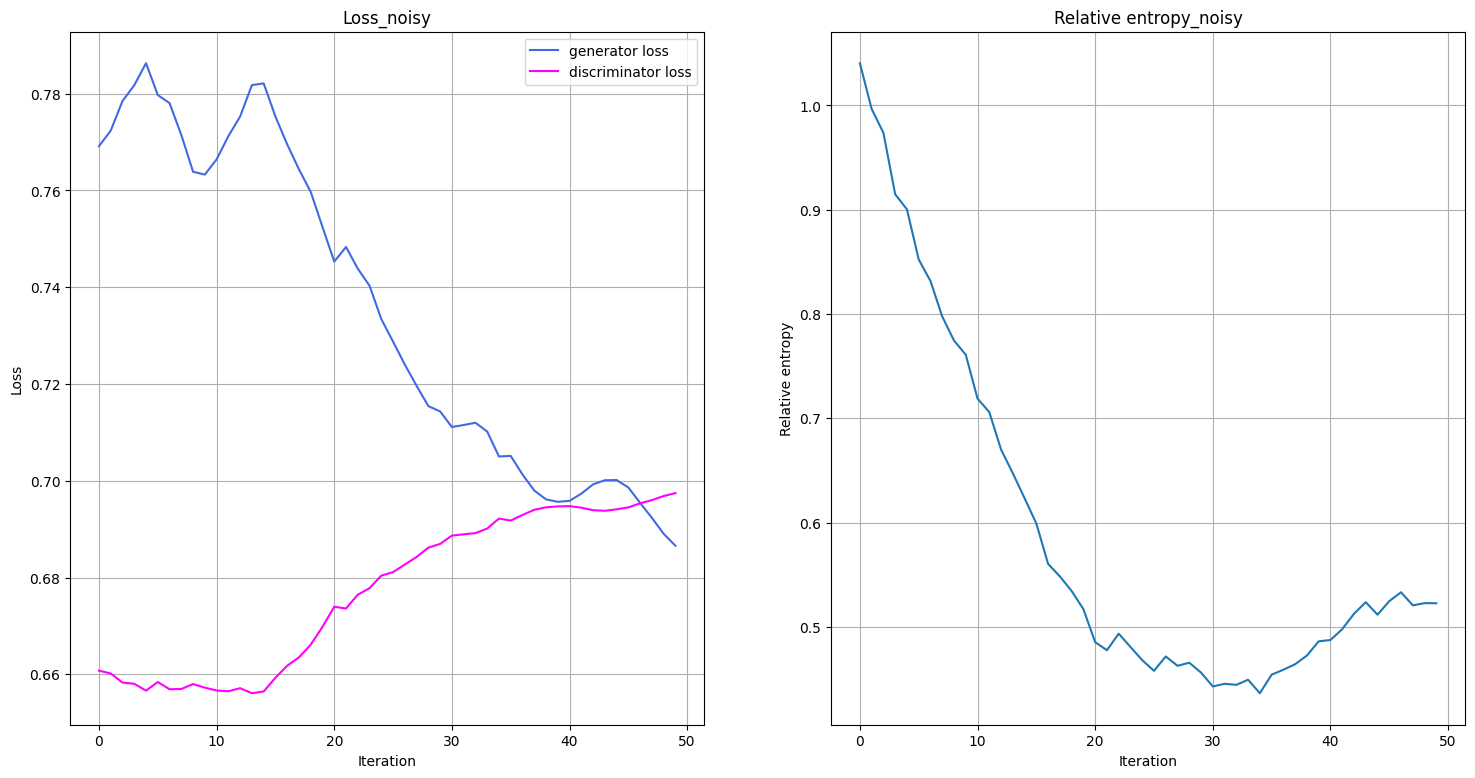

Fit in 280.31 sec


In [80]:
# noisy
import time
from scipy.stats import multivariate_normal, entropy

n_epochs = 50

num_qnn_outputs = num_discrete_values**num_dim

generator_loss_values = []
discriminator_loss_values = []
entropy_values = []

start = time.time()
for epoch in range(n_epochs):

    valid = torch.ones(num_qnn_outputs, 1, dtype=torch.float)
    fake = torch.zeros(num_qnn_outputs, 1, dtype=torch.float)

    # Configure input
    real_dist = torch.tensor(prob_data, dtype=torch.float).reshape(-1, 1)

    # Configure samples
    samples = torch.tensor(grid_elements, dtype=torch.float)
    disc_value = discriminator(samples)

    # Generate data
    gen_dist = generator_noise(torch.tensor([])).reshape(-1, 1)

    # Train generator
    generator_optimizer_noise.zero_grad()
    generator_loss = adversarial_loss(disc_value, valid, gen_dist)

    # store for plotting
    generator_loss_values.append(generator_loss.detach().item())

    generator_loss.backward(retain_graph=True)
    generator_optimizer_noise.step()

    # Train Discriminator
    discriminator_optimizer.zero_grad()

    real_loss = adversarial_loss(disc_value, valid, real_dist)
    fake_loss = adversarial_loss(disc_value, fake, gen_dist.detach())
    discriminator_loss = (real_loss + fake_loss) / 2

    # Store for plotting
    discriminator_loss_values.append(discriminator_loss.detach().item())

    discriminator_loss.backward()
    discriminator_optimizer.step()

    entropy_value = entropy(gen_dist.detach().squeeze().numpy(), prob_data)
    entropy_values.append(entropy_value)

    plot_training_progress_noise()

elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} sec")

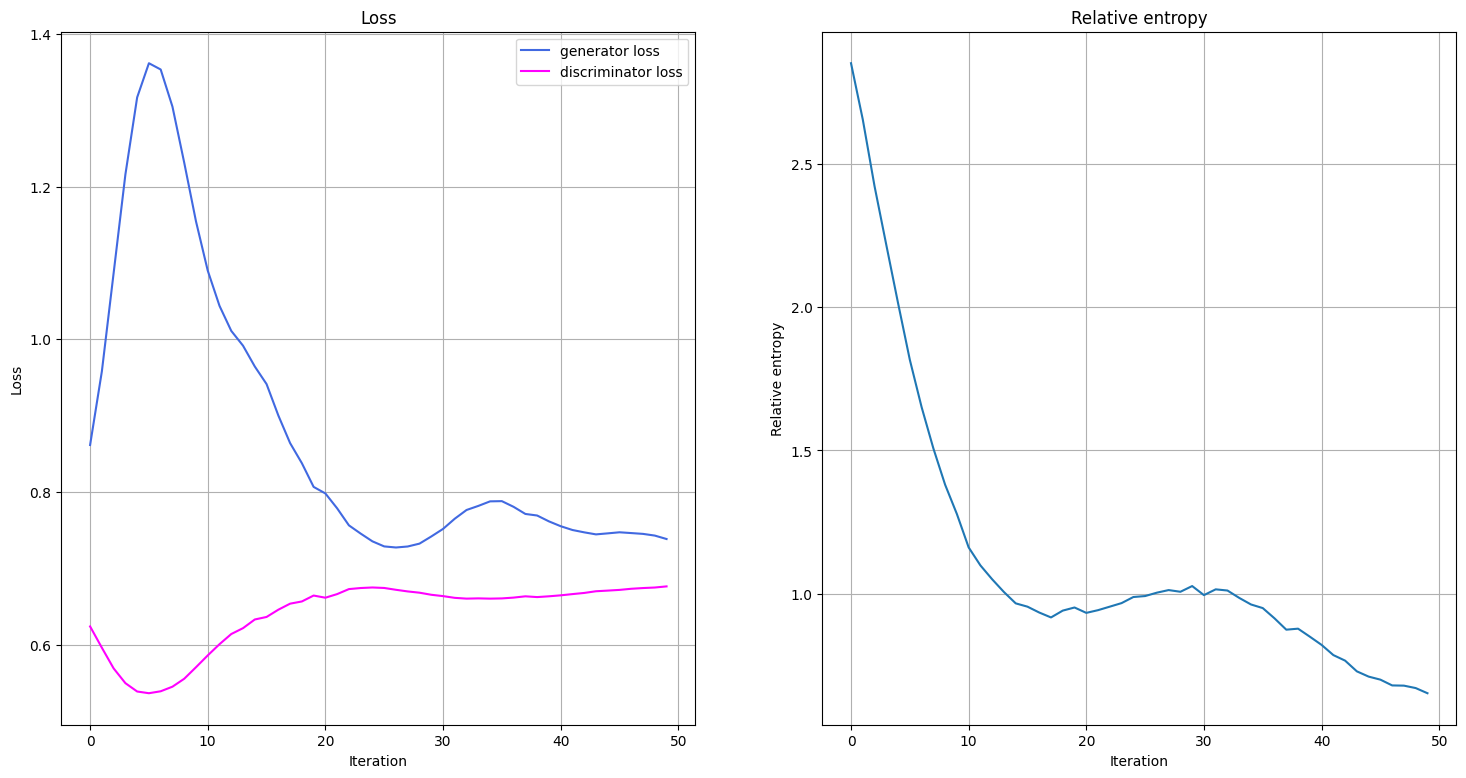

Fit in 117.20 sec


In [82]:
#without noise Zofal
import time
from scipy.stats import multivariate_normal, entropy

n_epochs = 50

num_qnn_outputs = num_discrete_values**num_dim

generator_loss_values = []
discriminator_loss_values = []
entropy_values = []

start = time.time()
for epoch in range(n_epochs):

    valid = torch.ones(num_qnn_outputs, 1, dtype=torch.float)
    fake = torch.zeros(num_qnn_outputs, 1, dtype=torch.float)

    # Configure input
    real_dist = torch.tensor(prob_data, dtype=torch.float).reshape(-1, 1)

    # Configure samples
    samples = torch.tensor(grid_elements, dtype=torch.float)
    disc_value = discriminator(samples)

    # Generate data
    gen_dist = generator_zofal(torch.tensor([])).reshape(-1, 1)

    # Train generator
    generator_optimizer_zofal.zero_grad()
    generator_loss = adversarial_loss(disc_value, valid, gen_dist)

    # store for plotting
    generator_loss_values.append(generator_loss.detach().item())

    generator_loss.backward(retain_graph=True)
    generator_optimizer_zofal.step()

    # Train Discriminator
    discriminator_optimizer.zero_grad()

    real_loss = adversarial_loss(disc_value, valid, real_dist)
    fake_loss = adversarial_loss(disc_value, fake, gen_dist.detach())
    discriminator_loss = (real_loss + fake_loss) / 2

    # Store for plotting
    discriminator_loss_values.append(discriminator_loss.detach().item())

    discriminator_loss.backward()
    discriminator_optimizer.step()

    entropy_value = entropy(gen_dist.detach().squeeze().numpy(), prob_data)
    entropy_values.append(entropy_value)

    plot_training_progress()

elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} sec")

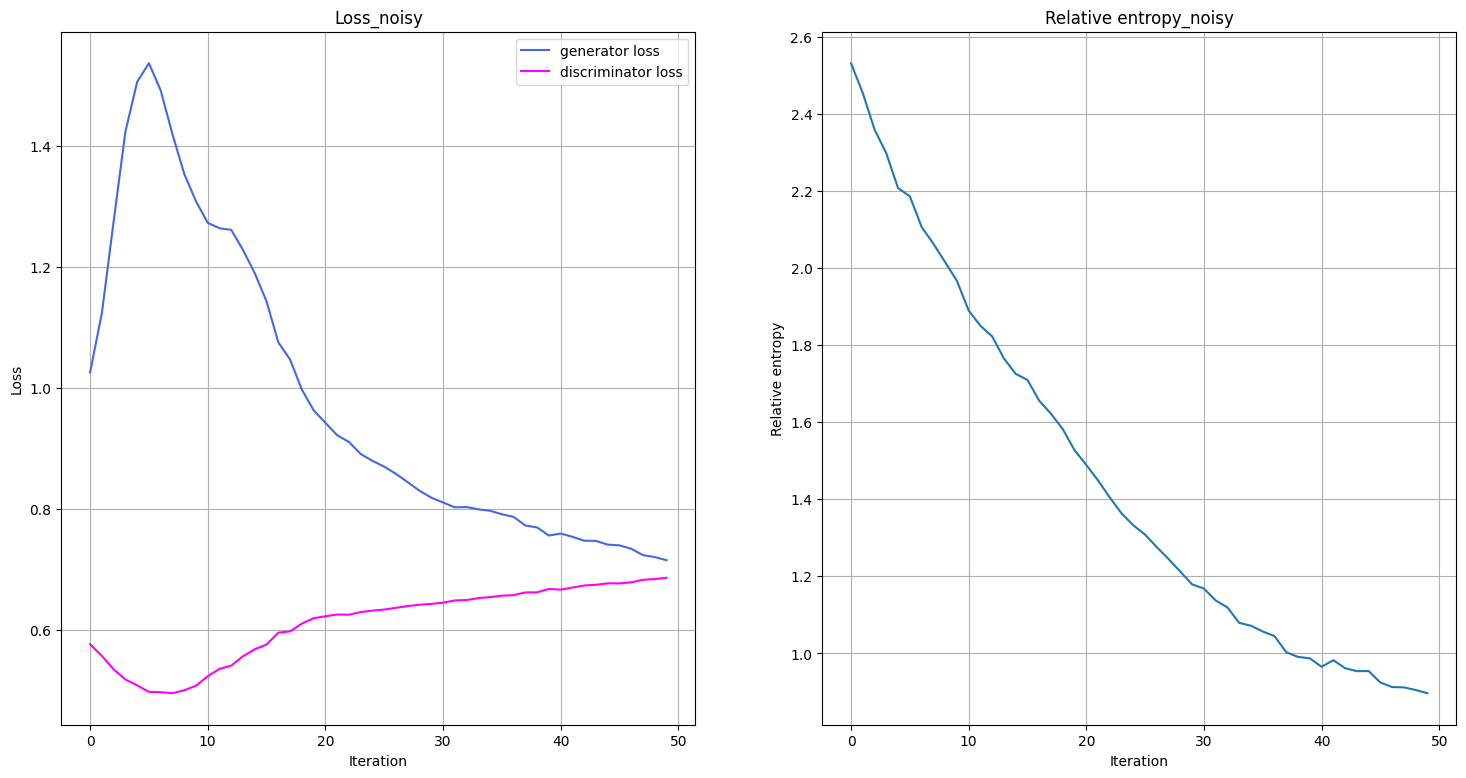

Fit in 234.66 sec


In [83]:
# noisy zofal
import time
from scipy.stats import multivariate_normal, entropy

n_epochs = 50

num_qnn_outputs = num_discrete_values**num_dim

generator_loss_values = []
discriminator_loss_values = []
entropy_values = []

start = time.time()
for epoch in range(n_epochs):

    valid = torch.ones(num_qnn_outputs, 1, dtype=torch.float)
    fake = torch.zeros(num_qnn_outputs, 1, dtype=torch.float)

    # Configure input
    real_dist = torch.tensor(prob_data, dtype=torch.float).reshape(-1, 1)

    # Configure samples
    samples = torch.tensor(grid_elements, dtype=torch.float)
    disc_value = discriminator(samples)

    # Generate data
    gen_dist = generator_zofal_noise(torch.tensor([])).reshape(-1, 1)

    # Train generator
    generator_optimizer_zofal_noise.zero_grad()
    generator_loss = adversarial_loss(disc_value, valid, gen_dist)

    # store for plotting
    generator_loss_values.append(generator_loss.detach().item())

    generator_loss.backward(retain_graph=True)
    generator_optimizer_zofal_noise.step()

    # Train Discriminator
    discriminator_optimizer.zero_grad()

    real_loss = adversarial_loss(disc_value, valid, real_dist)
    fake_loss = adversarial_loss(disc_value, fake, gen_dist.detach())
    discriminator_loss = (real_loss + fake_loss) / 2

    # Store for plotting
    discriminator_loss_values.append(discriminator_loss.detach().item())

    discriminator_loss.backward()
    discriminator_optimizer.step()

    entropy_value = entropy(gen_dist.detach().squeeze().numpy(), prob_data)
    entropy_values.append(entropy_value)

    plot_training_progress_noise()

elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} sec")

In [86]:
#Results: Cumulative Density Functions

with torch.no_grad():
    generated_probabilities = generator().numpy()

with torch.no_grad():
    generated_probabilities_noise = generator_noise().numpy()    

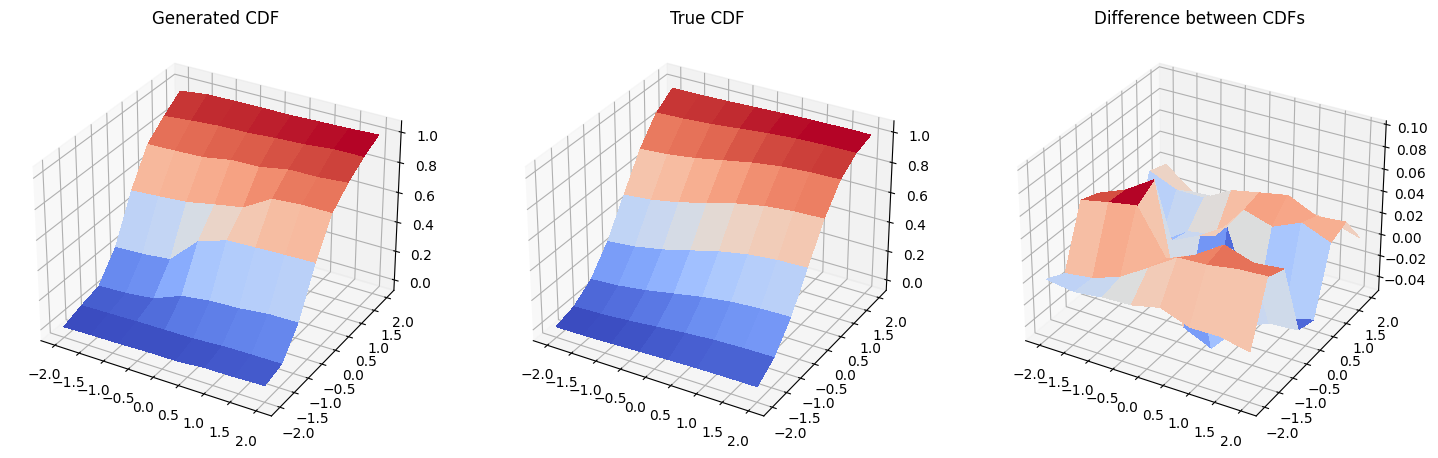

In [87]:
fig = plt.figure(figsize=(18, 9))

# Generated CDF
gen_prob_grid = np.reshape(np.cumsum(generated_probabilities), grid_shape)

ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax1.set_title("Generated CDF")
ax1.plot_surface(mesh_x, mesh_y, gen_prob_grid, linewidth=0, antialiased=False, cmap=cm.coolwarm)
ax1.set_zlim(-0.05, 1.05)

# Real CDF
real_prob_grid = np.reshape(np.cumsum(prob_data), grid_shape)

ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax2.set_title("True CDF")
ax2.plot_surface(mesh_x, mesh_y, real_prob_grid, linewidth=0, antialiased=False, cmap=cm.coolwarm)
ax2.set_zlim(-0.05, 1.05)

# Difference
ax3 = fig.add_subplot(1, 3, 3, projection="3d")
ax3.set_title("Difference between CDFs")
ax3.plot_surface(
    mesh_x, mesh_y, real_prob_grid - gen_prob_grid, linewidth=2, antialiased=False, cmap=cm.coolwarm
)
ax3.set_zlim(-0.05, 0.1)
plt.show()

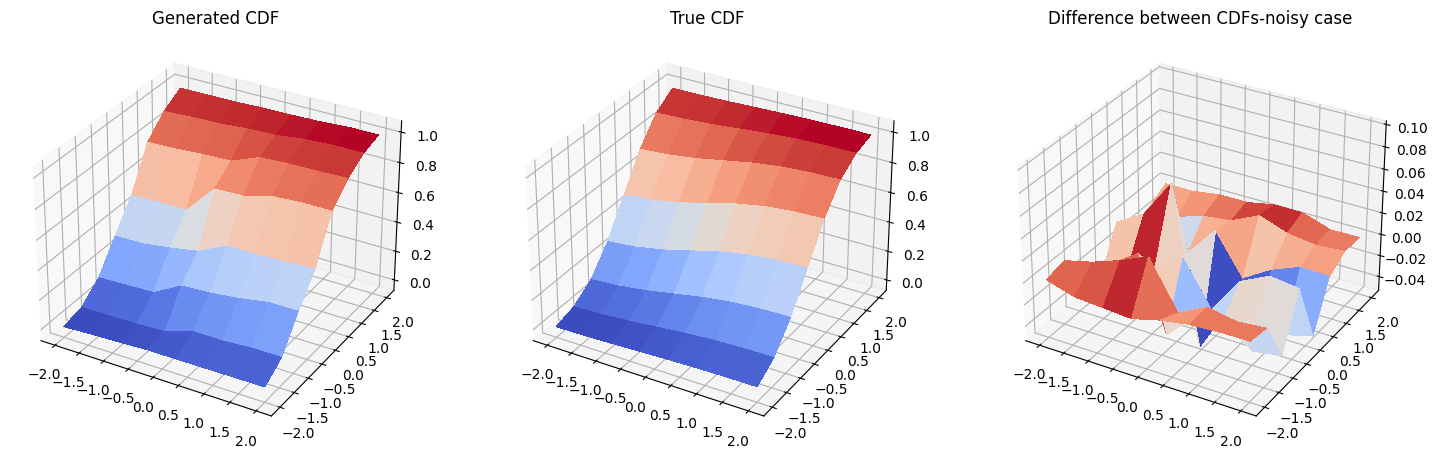

In [89]:
fig = plt.figure(figsize=(18, 9))

# Generated CDF
gen_prob_grid = np.reshape(np.cumsum(generated_probabilities_noise), grid_shape)

ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax1.set_title("Generated CDF")
ax1.plot_surface(mesh_x, mesh_y, gen_prob_grid, linewidth=0, antialiased=False, cmap=cm.coolwarm)
ax1.set_zlim(-0.05, 1.05)

# Real CDF
real_prob_grid = np.reshape(np.cumsum(prob_data), grid_shape)

ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax2.set_title("True CDF")
ax2.plot_surface(mesh_x, mesh_y, real_prob_grid, linewidth=0, antialiased=False, cmap=cm.coolwarm)
ax2.set_zlim(-0.05, 1.05)

# Difference
ax3 = fig.add_subplot(1, 3, 3, projection="3d")
ax3.set_title("Difference between CDFs-noisy case")
ax3.plot_surface(
    mesh_x, mesh_y, real_prob_grid - gen_prob_grid, linewidth=2, antialiased=False, cmap=cm.coolwarm
)
ax3.set_zlim(-0.05, 0.1)
plt.show()